In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os

In [ ]:
# image_path = "/home/cai/anlsts_exl_isc_minerva_Poc_2c0551ba_Sol_21/Sitaram/Image_Metadata_research/image_input/Invoice_3.png"
image_path = "/home/cai/anlsts_exl_isc_minerva_Poc_2c0551ba_Sol_21/Sitaram/Image_Metadata_research/AI_image_input/invoice_ai.png"
base_name = os.path.basename(image_path)
base_name = base_name[:-4]
base_name

In [1]:
# Load the image in grayscale mode
image = cv2.imread('temp_image.png', cv2.IMREAD_GRAYSCALE)

**Sobel Filter**

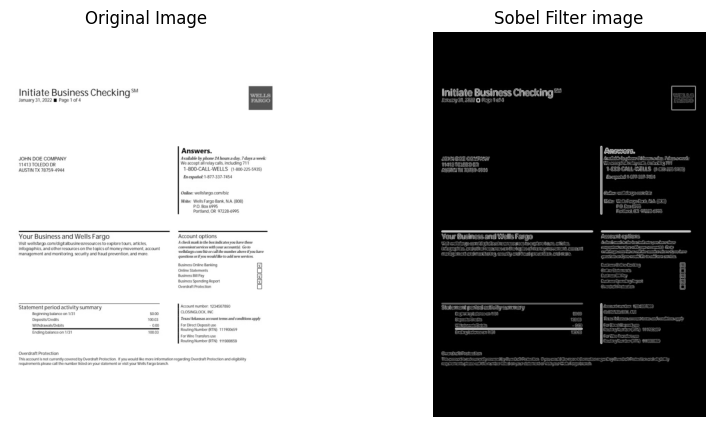

In [7]:
# def sobel_filter(image):
#     sobel_x_kernel = np.array([[-1, 0, 1],
#                              [-2, 0, 2],
#                              [-1, 0, 1]])

#     sobel_y_kernel = np.array([[-1, -2, -1],
#                              [0, 0, 0],
#                              [1, 2, 1]])

#     # Apply convolution with Sobel kernels
#     sobel_x = cv2.filter2D(image, cv2.CV_64F, sobel_x_kernel)
#     sobel_y = cv2.filter2D(image, cv2.CV_64F, sobel_y_kernel)

#     # Calculate gradient magnitude
#     gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

#     # Normalize the gradient magnitude to the range [0, 255]
#     normalized_gradient = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

#     return normalized_gradient

# # Apply Sobel filter
# output_edge_image = sobel_filter(image)

# # Display the original image and the edge image
# plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
# plt.imshow(image, cmap='gray')
# plt.title('Original Image')
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.imshow(output_edge_image, cmap='gray')
# plt.title('Sobel Filter image')
# plt.axis('off')

# plt.show()

**Canny Edge Detector**

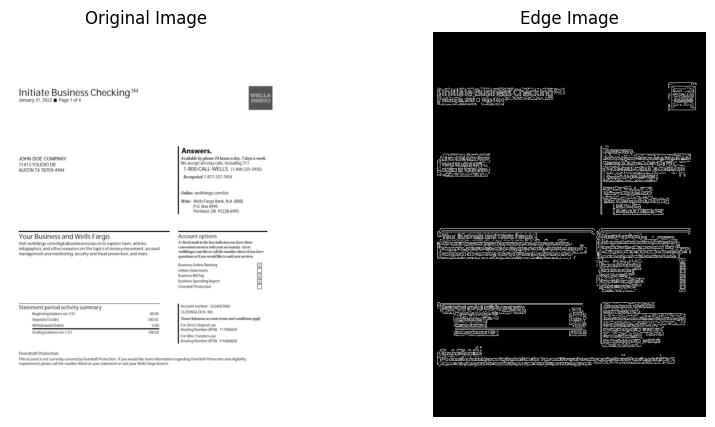

In [8]:
# Apply Canny edge detector
gradient_magnitude = np.sqrt(cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)**2 + cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)**2)
median_gradient = np.median(gradient_magnitude)

# Set thresholds based on the median
threshold1 = int(max(0, 0.7 * median_gradient))
threshold2 = int(min(255, 1.3 * median_gradient))

edges = cv2.Canny(image, threshold1, threshold2)

# Display the original image and the edge image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Image')
plt.axis('off')

output_path = f"canny_edge_{base_name}.png"  # Specify the output file path and name
plt.savefig(output_path)
plt.show()

**Laplacian of Gaussian (LoG)**

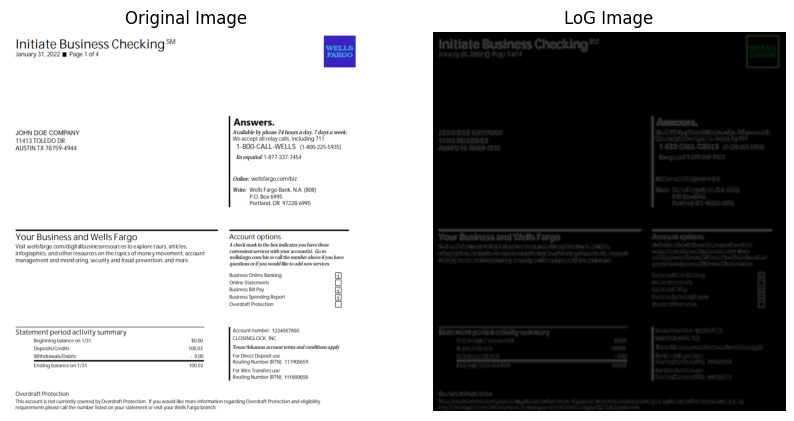

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your image (make sure to update the path to your image)
image_path = 'white_bg_images/input/Wells_Fargo_tampered_screenshot_img.png'  # Change this to your image path
image = cv2.imread(image_path)#, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur
# The parameters here are (src, ksize, sigmaX)
# ksize is the kernel size. We're using 5x5 in this example. 
# sigmaX is the standard deviation in the X direction. Setting it to 0 lets OpenCV automatically determine it.
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Laplacian operator
# The parameters are (src, ddepth)
# ddepth is the desired depth of the destination image. We use cv2.CV_64F to avoid overflow.
laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

# Since the Laplacian can have negative values, we're converting it to a format that can be properly displayed
laplacian = np.uint8(np.absolute(laplacian))

# Displaying the original and the edge-detected image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('LoG Image')
plt.axis('off')

plt.show()

**ELA**

Maximum difference was 119


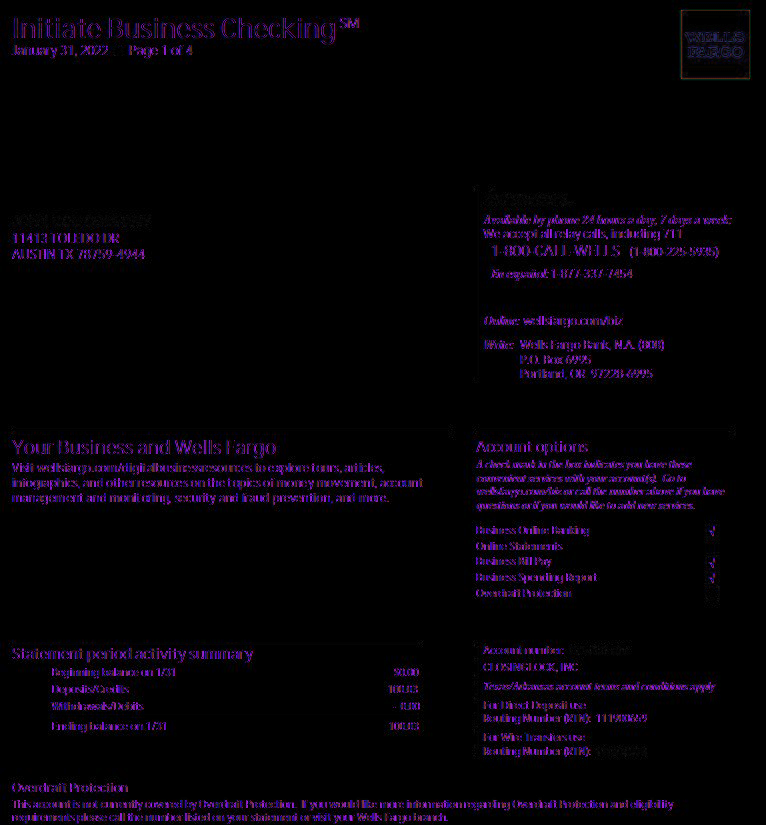

In [15]:
from PIL import Image, ImageChops, ImageEnhance

def perform_ela(image_path, output_path, quality):
    
    original_image = Image.open(image_path).convert('RGB')
    original_image.save('temp.jpg', 'JPEG', quality=quality)
    compressed_image = Image.open('temp.jpg')
    ela_image = ImageChops.difference(original_image, compressed_image)
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    scale = 255.0 / max_diff
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    print(f"Maximum difference was {max_diff}")
    ela_image.save(output_path)
    
    return ela_image

image_path = 'white_bg_images/input/Wells_Fargo_tampered_screenshot_img.png'  # Change this to your image path
output_path = 'ela_image.png'
quality = 90

ela_result = perform_ela(image_path, output_path, quality)

ela_result.show()

-Open an image and saves it to a temporary JPEG at a defined quality level
-Re-open this compressed image and computes the difference between it and the original image
-highlighting potential areas of manipulation. The enhanced differences often indicate areas where the image data has changed more significantly from the recompression, which could suggest tampering

**Frequency Split**

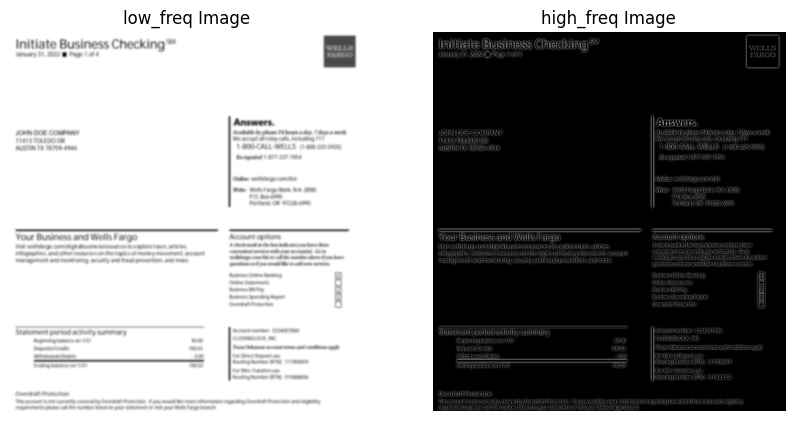

Low frequency component saved as low_frequency.jpg
High frequency component saved as high_frequency.jpg


In [16]:
import cv2
import numpy as np

def frequency_split(image_path, sigma=2):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError("Image not found at the specified path.")
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    low_freq = cv2.GaussianBlur(gray, (0, 0), sigma)
    high_freq = cv2.subtract(gray, low_freq)
    
    # Displaying the original and the edge-detected image
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(low_freq, cmap='gray')
    plt.title('low_freq Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(high_freq, cmap='gray')
    plt.title('high_freq Image')
    plt.axis('off')

    plt.show()

    return "low_frequency.jpg", "high_frequency.jpg"

image_path = 'white_bg_images/input/Wells_Fargo_tampered_screenshot_img.png'  # Change this to your image path
low_freq_image, high_freq_image = frequency_split(image_path)
print(f"Low frequency component saved as {low_freq_image}")
print(f"High frequency component saved as {high_freq_image}")


-By separating the high and low-frequency components of an image, you can focus on fine details (high frequency) or the overall structure (low frequency)
-you can use a Gaussian blur to separate these frequencies. The idea is to blur the image (which retains the low-frequency components) and then subtract the blurred version from the original image to get the high-frequency components

**Frequency Split using Guassian Pyramid and Laplacian**

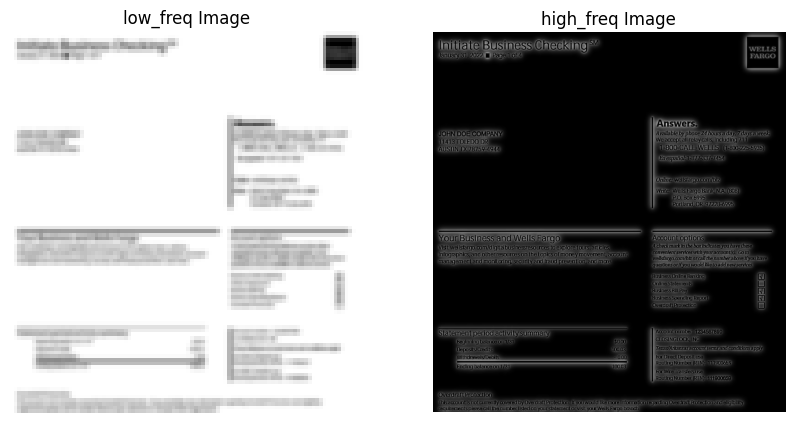

Low frequency component saved as low_frequency_laplacian.jpg
High frequency component saved as high_frequency_laplacian.jpg


In [17]:
import cv2
import numpy as np

def build_gaussian_pyramid(src, level = 3):
    lower = src.copy()
    gaussian_pyramid = [lower]
    for i in range(level):
        lower = cv2.pyrDown(lower)
        gaussian_pyramid.append(np.copy(lower))
    return gaussian_pyramid

def build_laplacian_pyramid(src, levels = 3):
    gaussian_pyramid = build_gaussian_pyramid(src, levels)
    laplacian_pyramid = []
    for i in range(levels, 0, -1):
        size = (gaussian_pyramid[i-1].shape[1], gaussian_pyramid[i-1].shape[0])
        gaussian_expanded = cv2.pyrUp(gaussian_pyramid[i], dstsize=size)
        laplacian = cv2.subtract(gaussian_pyramid[i-1], gaussian_expanded)
        laplacian_pyramid.append(laplacian)
    return laplacian_pyramid

def frequency_split_laplacian(image_path, levels=3):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError("Image not found at the specified path.")
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Build Laplacian Pyramid
    laplacian_pyramid = build_laplacian_pyramid(gray, levels)
    
    # The last level of the Gaussian Pyramid is the low frequency component
    gaussian_pyramid = build_gaussian_pyramid(gray, levels)
    low_freq = gaussian_pyramid[-1]
    
    # Combine Laplacian pyramid to get the high frequency component
    high_freq = laplacian_pyramid[0]
    for i in range(1, levels):
        size = (laplacian_pyramid[i].shape[1], laplacian_pyramid[i].shape[0])
        high_freq = cv2.pyrUp(high_freq, dstsize=size)
        high_freq = cv2.add(high_freq, laplacian_pyramid[i])
    
    # Displaying the original and the edge-detected image
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(low_freq, cmap='gray')
    plt.title('low_freq Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(high_freq, cmap='gray')
    plt.title('high_freq Image')
    plt.axis('off')

    plt.show()

    return "low_frequency_laplacian.jpg", "high_frequency_laplacian.jpg"

image_path = 'white_bg_images/input/Wells_Fargo_tampered_screenshot_img.png'

low_freq_image, high_freq_image = frequency_split_laplacian(image_path)
print(f"Low frequency component saved as {low_freq_image}")
print(f"High frequency component saved as {high_freq_image}")


-constructs a Gaussian pyramid by repeatedly applying the pyrDown operation, which reduces the image size and blurs it, mimicking the effect of viewing the image from a greater distance or at a lower resolution
-build a Laplacian pyramid from the Gaussian pyramid. The Laplacian pyramid layers are formed by subtracting each level of the Gaussian pyramid from its expanded version of the next level up.
-This results in layers capturing the image details between different scales.
-The lowest level of the Gaussian pyramid, which has undergone the most downsampling and blurring, represents the low-frequency components of the image.
-The high-frequency components are reconstructed by combining all layers of the Laplacian pyramid